In [1]:
import sys
sys.path.append('../_amigocloud')

In [2]:
import simplekml

In [4]:
from amigocloud import AmigoCloud
import pandas as pd
from shapely import wkb

import geopandas as gpd
from shapely.geometry import Point, Polygon, MultiPolygon, MultiPoint
#from shapely.geometry import Point, MultiPoint
import os
#from fastkml import kml

In [5]:
# ruta de carpera donde estan las llaves
ruta = open('../ruta.txt')
ruta = ruta.readlines()[0]

In [6]:
# leer token
acceso = open(ruta + '/_keys/api_amigocloud.key','r')
api_token = acceso.readlines()[0]
acceso.close()
amigocloud = AmigoCloud(token=api_token)
amigocloud

In [7]:
# leer los dos shps de siembra y puntos de planificacion
path_siembras = r'G:\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\2024\SHP\SIEMBRAS.shp'
path_cat = r'G:\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\2024\SHP\catastro140624.shp'
path_puntos = r'G:\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\2024\SHP\PUNTOS_PLAN.shp'

path_plan = r'G:\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\2024\SHP\PLANIFICACION.shp'

path_kml = r'G:\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\2024\KML_PLAN'

path_xlsx_parte = r'G:\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\PARTE DIARIO TRICHOGRAMMA 2024_RES.xlsx'

# ACTUALIZAR SHP PLANIFICACION

In [8]:
ors =54

In [9]:
gdf_siembras = gpd.read_file(path_siembras)
gdf_puntos = gpd.read_file(path_puntos)
gdf_cat = gpd.read_file(path_cat)

In [10]:
# verifica si ambos shps tienen el mismo CRS
if gdf_siembras.crs == gdf_puntos.crs:
    print('Ambas capas tienen el mismo CRS')
else:
    print('No tienen el mismo CRS')

Ambas capas tienen el mismo CRS


In [11]:
# filtrar la semana de interes
gdf_puntos_select = gdf_puntos[gdf_puntos['os'] == ors]
gdf_puntos_sem = gdf_puntos_select.copy()
#quita caracteres especiales
gdf_puntos_sem['unidad_04'] = gdf_puntos_sem['unidad_04'].str.replace(r'[\r\n\t]', '', regex=True)
gdf_puntos_sem

,unidad_03,unidad_04,os,dia,obs,procesado,geometry
56,3323,TREPP CARRASCO RUDIGER,54,0,None,None,"MULTIPOINT (465826.254 8086284.526, 466162.500..."
57,75,AGUILERA TARADELLES NELSON MARIANO,54,0,None,None,"MULTIPOINT (474097.719 8092983.409, 474326.056..."
58,10863,PAZ REA ROSENDO,54,0,None,None,"MULTIPOINT (487699.636 8103640.574, 487101.443..."
59,388,AGROPECUARIA MARIANA S.R.L.,54,0,None,None,"MULTIPOINT (491412.746 8089119.093, 491672.936..."
60,42345,VICENTE OSTRIA JOSE ENRIQUE,54,0,None,None,"MULTIPOINT (523988.880 8076612.030, 523495.274..."
61,42345,VICENTE OSTRIA JOSE ENRIQUE,54,0,None,None,"MULTIPOINT (517686.710 8074561.037, 518353.546..."
62,30035,GUTIERREZ AGUILERA WIDEN GUILLER,54,0,None,None,"MULTIPOINT (478668.845 8089165.029, 478366.435..."


In [12]:
multipoint_gdf = gdf_puntos_sem

In [13]:
# Crear una lista para almacenar los nuevos registros de puntos individuales
point_records = []
# Iterar sobre cada registro en el GeoDataFrame original
for idx, row in multipoint_gdf.iterrows():
    multipoint_geom = row.geometry
    # Verificar si la geometría es de tipo multipunto
    if isinstance(multipoint_geom, MultiPoint):
        for point in multipoint_geom.geoms:
            # Crear un nuevo registro para cada punto individual
            new_record = row.copy()
            new_record.geometry = point
            point_records.append(new_record)
    else:
        # Si la geometría ya es un punto, simplemente añadir el registro original
        point_records.append(row)

# Crear un nuevo GeoDataFrame con los registros de puntos individuales
puntos_indi = gpd.GeoDataFrame(point_records, crs=multipoint_gdf.crs)

In [14]:
# puntos individuales
puntos_indi

,unidad_03,unidad_04,os,dia,obs,procesado,geometry
56,3323,TREPP CARRASCO RUDIGER,54,0,None,None,POINT (465826.254 8086284.526)
56,3323,TREPP CARRASCO RUDIGER,54,0,None,None,POINT (466162.500 8086515.773)
56,3323,TREPP CARRASCO RUDIGER,54,0,None,None,POINT (466105.001 8086328.275)
56,3323,TREPP CARRASCO RUDIGER,54,0,None,None,POINT (466419.998 8086365.775)
56,3323,TREPP CARRASCO RUDIGER,54,0,None,None,POINT (466090.001 8086110.778)
...,...,...,...,...,...,...,...
62,30035,GUTIERREZ AGUILERA WIDEN GUILLER,54,0,None,None,POINT (478668.845 8089165.029)
62,30035,GUTIERREZ AGUILERA WIDEN GUILLER,54,0,None,None,POINT (478366.435 8089061.171)
62,30035,GUTIERREZ AGUILERA WIDEN GUILLER,54,0,None,None,POINT (478366.435 8088822.909)
62,30035,GUTIERREZ AGUILERA WIDEN GUILLER,54,0,None,None,POINT (478400.036 8088587.701)


<Axes: >

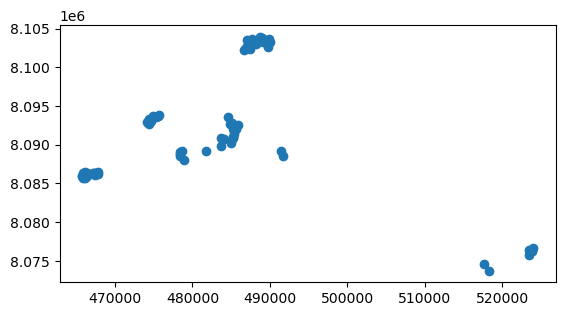

In [15]:
puntos_indi.plot()

In [16]:
# Asegurarse de que ambos GeoDataFrames tienen el mismo sistema de coordenadas (CRS)
if puntos_indi.crs != gdf_siembras.crs:
    print('Los CRS no son iguales')
    #gdf_siembras = gdf_siembras.to_crs(puntos_indi.crs)
else:
    print('Los CRS si son iguales')

Los CRS si son iguales


In [17]:
# Crear un GeoDataFrame vacío para almacenar los puntos que no intersectan con ningún polígono de siembras
puntos_indi_solicitado = puntos_indi[~puntos_indi.geometry.apply(lambda point: any(gdf_siembras.contains(point)))]

In [18]:
puntos_indi_solicitado

,unidad_03,unidad_04,os,dia,obs,procesado,geometry
56,3323,TREPP CARRASCO RUDIGER,54,0,None,None,POINT (465826.254 8086284.526)
56,3323,TREPP CARRASCO RUDIGER,54,0,None,None,POINT (466162.500 8086515.773)
56,3323,TREPP CARRASCO RUDIGER,54,0,None,None,POINT (466105.001 8086328.275)
56,3323,TREPP CARRASCO RUDIGER,54,0,None,None,POINT (466419.998 8086365.775)
56,3323,TREPP CARRASCO RUDIGER,54,0,None,None,POINT (466090.001 8086110.778)
56,3323,TREPP CARRASCO RUDIGER,54,0,None,None,POINT (465767.505 8085985.779)
56,3323,TREPP CARRASCO RUDIGER,54,0,None,None,POINT (465749.117 8085902.656)
56,3323,TREPP CARRASCO RUDIGER,54,0,None,None,POINT (465871.254 8085925.780)
56,3323,TREPP CARRASCO RUDIGER,54,0,None,None,POINT (466123.751 8085928.280)
56,3323,TREPP CARRASCO RUDIGER,54,0,None,None,POINT (466406.248 8085967.029)


In [19]:
# identifoca los lotes que se intersectan
gdf_lotes_cat = gpd.sjoin(gdf_cat, puntos_indi_solicitado, how='inner', predicate='intersects')
# filtra los lotes intersectados en la capa original
poligonos_intersect_cat = gdf_cat.loc[gdf_cat.index.isin(gdf_lotes_cat.index)]
# copy
poligonos_intersect_cat = poligonos_intersect_cat.copy()
poligonos_intersect_cat = poligonos_intersect_cat[['unidad_01', 'unidad_02', 'unidad_03', 'unidad_04', 'unidad_05', 'area', 'soca', 'zona', 'geometry']]

In [20]:
# Cambiar el nombre de la columna 'old_name' a 'new_name'
poligonos_intersect_cat.rename(columns={'zona': 'inst'}, inplace=True)

In [21]:
poligonos_intersect_cat

,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,area,soca,inst,geometry
342,270,POTREROS DEL OBISPO ECOFO,3323,TREPP CARRASCO RUDIGER,L28,5.105680,0,50,"POLYGON ((467610.615 8086536.888, 467621.229 8..."
343,270,POTREROS DEL OBISPO ECOFO,3323,TREPP CARRASCO RUDIGER,L30,6.095181,0,50,"POLYGON ((467495.508 8086542.654, 467569.066 8..."
344,270,POTREROS DEL OBISPO ECOFO,3323,TREPP CARRASCO RUDIGER,L36,3.969127,0,50,"POLYGON ((467218.856 8086500.751, 467217.001 8..."
345,270,POTREROS DEL OBISPO ECOFO,3323,TREPP CARRASCO RUDIGER,L8.2,0.121299,14,50,"POLYGON ((465760.015 8085952.375, 465770.503 8..."
346,270,POTREROS DEL OBISPO ECOFO,3323,TREPP CARRASCO RUDIGER,L7.1,0.109672,14,50,"POLYGON ((465766.265 8086035.502, 465769.092 8..."
347,270,POTREROS DEL OBISPO ECOFO,3323,TREPP CARRASCO RUDIGER,L5,1.343879,0,50,"POLYGON ((466302.906 8086492.860, 466211.104 8..."
348,270,POTREROS DEL OBISPO ECOFO,3323,TREPP CARRASCO RUDIGER,L11,7.166401,0,50,"POLYGON ((466362.655 8086135.378, 466326.258 8..."
648,1,SONIMA,388,AGROPECUARIA MARIANA S.R.L.,L18,10.944600,3,69,"POLYGON ((491804.348 8088982.669, 491789.173 8..."
652,19,SANTA BARBARA,388,AGROPECUARIA MARIANA S.R.L.,L3,10.799840,3,69,"POLYGON ((484263.689 8093403.482, 484230.802 8..."
1230,216,LA ESTACADA--AGUILERA,75,AGUILERA TARADELLES NELSON MARIANO,L7.2,7.023221,0,50,"POLYGON ((475649.777 8093580.297, 475628.532 8..."


In [22]:
# CAMBIAR NOMBRE DATOS DE UNIDAD_03 Y UNDIAD_04 DE LOTES SOLICITADOS A LO INDICADO EN LOS PUNTOS
# Iterar sobre cada punto y encontrar el polígono que intersecta
for idx, point in puntos_indi_solicitado.iterrows():
    point_geom = point.geometry
    matching_polygons = poligonos_intersect_cat[poligonos_intersect_cat.intersects(point_geom)]
    
    # Actualizar los campos de los polígonos que intersectan con los valores del punto
    for poly_idx in matching_polygons.index:
        poligonos_intersect_cat.at[poly_idx, 'unidad_03'] = point['unidad_03']
        poligonos_intersect_cat.at[poly_idx, 'unidad_04'] = point['unidad_04']

In [23]:
poligonos_intersect_cat

,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,area,soca,inst,geometry
342,270,POTREROS DEL OBISPO ECOFO,3323,TREPP CARRASCO RUDIGER,L28,5.105680,0,50,"POLYGON ((467610.615 8086536.888, 467621.229 8..."
343,270,POTREROS DEL OBISPO ECOFO,3323,TREPP CARRASCO RUDIGER,L30,6.095181,0,50,"POLYGON ((467495.508 8086542.654, 467569.066 8..."
344,270,POTREROS DEL OBISPO ECOFO,3323,TREPP CARRASCO RUDIGER,L36,3.969127,0,50,"POLYGON ((467218.856 8086500.751, 467217.001 8..."
345,270,POTREROS DEL OBISPO ECOFO,3323,TREPP CARRASCO RUDIGER,L8.2,0.121299,14,50,"POLYGON ((465760.015 8085952.375, 465770.503 8..."
346,270,POTREROS DEL OBISPO ECOFO,3323,TREPP CARRASCO RUDIGER,L7.1,0.109672,14,50,"POLYGON ((465766.265 8086035.502, 465769.092 8..."
347,270,POTREROS DEL OBISPO ECOFO,3323,TREPP CARRASCO RUDIGER,L5,1.343879,0,50,"POLYGON ((466302.906 8086492.860, 466211.104 8..."
348,270,POTREROS DEL OBISPO ECOFO,3323,TREPP CARRASCO RUDIGER,L11,7.166401,0,50,"POLYGON ((466362.655 8086135.378, 466326.258 8..."
648,1,SONIMA,388,AGROPECUARIA MARIANA S.R.L.,L18,10.944600,3,69,"POLYGON ((491804.348 8088982.669, 491789.173 8..."
652,19,SANTA BARBARA,388,AGROPECUARIA MARIANA S.R.L.,L3,10.799840,3,69,"POLYGON ((484263.689 8093403.482, 484230.802 8..."
1230,216,LA ESTACADA--AGUILERA,75,AGUILERA TARADELLES NELSON MARIANO,L7.2,7.023221,0,50,"POLYGON ((475649.777 8093580.297, 475628.532 8..."


In [24]:
# agrega los campos faltantes
poligonos_intersect_cat['fecha_ini'] = ''
poligonos_intersect_cat['origen'] = 'SOLICITUD'
poligonos_intersect_cat['dias'] = 0
poligonos_intersect_cat['fecha'] = ''
poligonos_intersect_cat['os'] = ors

In [25]:
poligonos_intersect_cat

,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,area,soca,inst,geometry,fecha_ini,origen,dias,fecha,os
342,270,POTREROS DEL OBISPO ECOFO,3323,TREPP CARRASCO RUDIGER,L28,5.105680,0,50,"POLYGON ((467610.615 8086536.888, 467621.229 8...",,SOLICITUD,0,,54
343,270,POTREROS DEL OBISPO ECOFO,3323,TREPP CARRASCO RUDIGER,L30,6.095181,0,50,"POLYGON ((467495.508 8086542.654, 467569.066 8...",,SOLICITUD,0,,54
344,270,POTREROS DEL OBISPO ECOFO,3323,TREPP CARRASCO RUDIGER,L36,3.969127,0,50,"POLYGON ((467218.856 8086500.751, 467217.001 8...",,SOLICITUD,0,,54
345,270,POTREROS DEL OBISPO ECOFO,3323,TREPP CARRASCO RUDIGER,L8.2,0.121299,14,50,"POLYGON ((465760.015 8085952.375, 465770.503 8...",,SOLICITUD,0,,54
346,270,POTREROS DEL OBISPO ECOFO,3323,TREPP CARRASCO RUDIGER,L7.1,0.109672,14,50,"POLYGON ((465766.265 8086035.502, 465769.092 8...",,SOLICITUD,0,,54
347,270,POTREROS DEL OBISPO ECOFO,3323,TREPP CARRASCO RUDIGER,L5,1.343879,0,50,"POLYGON ((466302.906 8086492.860, 466211.104 8...",,SOLICITUD,0,,54
348,270,POTREROS DEL OBISPO ECOFO,3323,TREPP CARRASCO RUDIGER,L11,7.166401,0,50,"POLYGON ((466362.655 8086135.378, 466326.258 8...",,SOLICITUD,0,,54
648,1,SONIMA,388,AGROPECUARIA MARIANA S.R.L.,L18,10.944600,3,69,"POLYGON ((491804.348 8088982.669, 491789.173 8...",,SOLICITUD,0,,54
652,19,SANTA BARBARA,388,AGROPECUARIA MARIANA S.R.L.,L3,10.799840,3,69,"POLYGON ((484263.689 8093403.482, 484230.802 8...",,SOLICITUD,0,,54
1230,216,LA ESTACADA--AGUILERA,75,AGUILERA TARADELLES NELSON MARIANO,L7.2,7.023221,0,50,"POLYGON ((475649.777 8093580.297, 475628.532 8...",,SOLICITUD,0,,54


In [26]:
# SELECCIONAR LOS LOTES DE SIEMBRAS
# identifoca los lotes que se intersectan
gdf_lotes_siem = gpd.sjoin(gdf_siembras, multipoint_gdf, how='inner', predicate='intersects')
# filtra los lotes intersectados en la capa original
poligonos_intersect_siem = gdf_siembras.loc[gdf_siembras.index.isin(gdf_lotes_siem.index)]
# copy
poligonos_intersect_siem = poligonos_intersect_siem.copy()
# agregar campo de semana_planificacion
poligonos_intersect_siem['os'] = ors

In [27]:
# crea el campo soca, y coloca 0 o 1 dependiendo del origen
poligonos_intersect_siem['soca'] = poligonos_intersect_siem['origen'].apply(lambda x: 1 if 'SIEMBRA 2023' in x else 0)

In [28]:
poligonos_intersect_siem = poligonos_intersect_siem[['unidad_01', 'unidad_02', 'unidad_03', 'unidad_04', 'unidad_05', 'area',
       'fecha_ini', 'origen', 'dias', 'fecha', 'prioridad', 'inst', 'geometry', 'os', 'soca']]

In [29]:
poligonos_intersect_siem

,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,area,fecha_ini,origen,dias,fecha,prioridad,inst,geometry,os,soca
10,218,DON QUIJOTE,18358,ROJAS AMELUNGE CARLOS,L17,13.213371,31/5/2024,SIEMBRA 2023,64.0,2024-05-31,3,69.0,"POLYGON ((483898.699 8090226.458, 484023.882 8...",54,1
45,47,SANTA MARTHA,40149,PAZ REA JOSE ERNESTO,B3.1,7.146080,10/6/2024,SIEMBRA 2023,54.0,2024-06-10,6,69.0,"POLYGON ((488234.593 8102875.077, 488143.934 8...",54,1
66,47,SANTA MARTHA,40149,PAZ REA JOSE ERNESTO,B6.1,5.350438,5/6/2024,SIEMBRA 2023,89.0,2024-06-05,6,69.0,"POLYGON ((487716.230 8102657.403, 487703.730 8...",54,1
84,47,SANTA MARTHA,40149,PAZ REA JOSE ERNESTO,A12.2,3.831544,21/5/2024,SIEMBRA 2023,74.0,2024-05-21,6,69.0,"POLYGON ((489569.541 8103030.428, 489934.785 8...",54,1
129,47,SANTA MARTHA,40149,PAZ REA JOSE ERNESTO,A7,10.696703,21/5/2024,SIEMBRA 2023,74.0,2024-05-21,6,69.0,"POLYGON ((488616.298 8103763.516, 488519.488 8...",54,1
331,47,SANTA MARTHA,40149,PAZ REA JOSE ERNESTO,C7.1,6.880620,31/5/2024,SIEMBRA 2023,64.0,2024-05-31,6,69.0,"POLYGON ((486592.138 8102561.122, 486830.902 8...",54,1
370,47,SANTA MARTHA,40149,PAZ REA JOSE ERNESTO,A11,4.751152,21/5/2024,SIEMBRA 2023,74.0,2024-05-21,6,69.0,"POLYGON ((489693.914 8103664.919, 489697.036 8...",54,1
372,47,SANTA MARTHA,40149,PAZ REA JOSE ERNESTO,B7.2,2.325797,5/6/2024,SIEMBRA 2023,89.0,2024-06-05,6,69.0,"POLYGON ((486927.637 8102989.319, 487059.535 8...",54,1
534,19,SANTA BARBARA,18358,ROJAS AMELUNGE CARLOS,L11.5,3.669253,2024-05-25,SIEMBRA 2024,70.0,2024-05-25,3,0.0,"POLYGON ((484739.418 8092729.759, 484997.965 8...",54,0
537,218,DON QUIJOTE,18358,ROJAS AMELUNGE CARLOS,L18,10.997816,2024-05-11,SIEMBRA 2024,84.0,2024-05-11,3,0.0,"POLYGON ((483606.224 8089595.115, 483744.514 8...",54,0


In [30]:
# Concatenar los DataFrames a lo largo de las filas (axis=0)
plan = pd.concat([poligonos_intersect_cat, poligonos_intersect_siem], axis=0)
# Si deseas restablecer el índice después de concatenar
plan.reset_index(drop=True, inplace=True)

<Axes: >

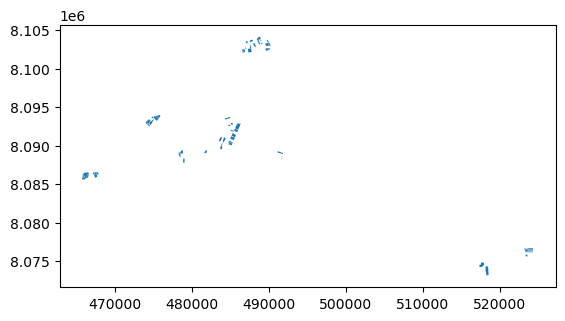

In [31]:
plan.plot()

In [32]:
plan['area'].sum()

614.972324909718

In [33]:
#RECALCULAR EL AREA
plan['area'] = plan.geometry.area / 10000

In [34]:
plan['area'].sum()

614.9723249098298

In [35]:
# carga el shp de planificacion
gdf_plan = gpd.read_file(path_plan)

In [36]:
# determina el ultimo id
last_id = 0
if gdf_plan['id'].max() > 0:
    last_id = gdf_plan['id'].max()
else:
    last_id = 0

In [37]:
last_id

552

In [38]:
# Asignar valores incrementales a la columna 'id' empezando desde last_id + 1
plan['id'] = range(last_id + 1, last_id + 1 + len(plan))

In [39]:
plan

,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,area,soca,inst,geometry,fecha_ini,origen,dias,fecha,os,prioridad,id
0,270,POTREROS DEL OBISPO ECOFO,3323,TREPP CARRASCO RUDIGER,L28,5.105680,0,50,"POLYGON ((467610.615 8086536.888, 467621.229 8...",,SOLICITUD,0.0,,54,NaN,553
1,270,POTREROS DEL OBISPO ECOFO,3323,TREPP CARRASCO RUDIGER,L30,6.095181,0,50,"POLYGON ((467495.508 8086542.654, 467569.066 8...",,SOLICITUD,0.0,,54,NaN,554
2,270,POTREROS DEL OBISPO ECOFO,3323,TREPP CARRASCO RUDIGER,L36,3.969127,0,50,"POLYGON ((467218.856 8086500.751, 467217.001 8...",,SOLICITUD,0.0,,54,NaN,555
3,270,POTREROS DEL OBISPO ECOFO,3323,TREPP CARRASCO RUDIGER,L8.2,0.121299,14,50,"POLYGON ((465760.015 8085952.375, 465770.503 8...",,SOLICITUD,0.0,,54,NaN,556
4,270,POTREROS DEL OBISPO ECOFO,3323,TREPP CARRASCO RUDIGER,L7.1,0.109672,14,50,"POLYGON ((465766.265 8086035.502, 465769.092 8...",,SOLICITUD,0.0,,54,NaN,557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,47,SANTA MARTHA,10863,PAZ REA ROSENDO,A10.1,11.832131,0,0.0,"POLYGON ((488722.747 8103139.345, 488568.261 8...",2024-03-18,SIEMBRA 2024,138.0,2024-03-18,54,6.0,626
74,47,SANTA MARTHA,10863,PAZ REA ROSENDO,A8,1.610623,0,0.0,"POLYGON ((488803.824 8103715.552, 488968.511 8...",2024-03-25,SIEMBRA 2024,131.0,2024-03-25,54,6.0,627
75,47,SANTA MARTHA,10863,PAZ REA ROSENDO,B3.2,2.387886,0,0.0,"POLYGON ((488208.279 8103125.052, 488321.811 8...",2024-04-30,SIEMBRA 2024,95.0,2024-04-30,54,6.0,628
76,47,SANTA MARTHA,10863,PAZ REA ROSENDO,A12.3,9.455402,0,0.0,"POLYGON ((489934.758 8103123.199, 489569.534 8...",2024-05-06,SIEMBRA 2024,89.0,2024-05-06,54,6.0,629


In [40]:
len(plan)

78

In [41]:
# union de los dos gdf
gdf_pla_gral = pd.concat([gdf_plan, plan], ignore_index=True)

In [42]:
gdf_pla_gral['area'].sum()

5121.661406616659

In [43]:
gdf_pla_gral['unidad_01'] = gdf_pla_gral['unidad_01'].astype(int)
gdf_pla_gral['unidad_03'] = gdf_pla_gral['unidad_03'].astype(int)
gdf_pla_gral['dias'] = gdf_pla_gral['dias'].astype(int)
#gdf_pla_gral['prioridad'] = gdf_pla_gral['prioridad'].astype(int)
gdf_pla_gral['os'] = gdf_pla_gral['os'].astype(int)
gdf_pla_gral['soca'] = gdf_pla_gral['soca'].astype(int)
gdf_pla_gral['id'] = gdf_pla_gral['id'].astype(int)
gdf_pla_gral['inst'] = gdf_pla_gral['inst'].astype(int)

In [44]:
# exportar los datos en nuevo shp
gdf_pla_gral.to_file(path_plan)

In [45]:
gdf_pla_gral

,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,area,fecha_ini,origen,dias,fecha,...,os,soca,id,inst,telefono_1,telefono_2,telefono_3,idd,asignado,geometry
0,47,SANTA MARTHA,40149,PAZ REA JOSE ERNESTO,A7,10.696703,21/5/2024,SIEMBRA 2023,37,2024-05-21,...,26,1,1,69,0.0,0.0,0.0,35,None,"POLYGON ((488616.298 8103763.516, 488519.488 8..."
1,187,MATIAS--HABBAUER,5421,HUBBAUER HOYOS ENRIQUE,L7.2,1.835936,2024-04-15,SIEMBRA 2024,73,2024-04-15,...,26,0,2,62,0.0,0.0,NaN,54,None,"POLYGON ((473330.370 8101634.734, 473440.011 8..."
2,187,MATIAS--HABBAUER,5421,HUBBAUER HOYOS ENRIQUE,L6,1.960231,2024-04-15,SIEMBRA 2024,73,2024-04-15,...,26,0,3,62,0.0,0.0,NaN,54,None,"POLYGON ((473242.172 8101427.289, 473148.580 8..."
3,187,MATIAS--HABBAUER,5421,HUBBAUER HOYOS ENRIQUE,L9.1,3.607907,2024-04-16,SIEMBRA 2024,72,2024-04-16,...,26,0,4,62,0.0,0.0,NaN,54,None,"POLYGON ((473286.579 8101086.503, 473265.875 8..."
4,2123,LAS CHACRAS PORTACHUELO,13132,ZUMARAN MENACHO JORGE,L1.6,0.386826,2024-04-22,SIEMBRA 2024,66,2024-04-22,...,26,0,5,50,0.0,0.0,NaN,63,None,"POLYGON ((455236.898 8084312.120, 455248.807 8..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,47,SANTA MARTHA,10863,PAZ REA ROSENDO,A10.1,11.832131,2024-03-18,SIEMBRA 2024,138,2024-03-18,...,54,0,626,0,NaN,NaN,NaN,NaN,NaN,"POLYGON ((488722.747 8103139.345, 488568.261 8..."
602,47,SANTA MARTHA,10863,PAZ REA ROSENDO,A8,1.610623,2024-03-25,SIEMBRA 2024,131,2024-03-25,...,54,0,627,0,NaN,NaN,NaN,NaN,NaN,"POLYGON ((488803.824 8103715.552, 488968.511 8..."
603,47,SANTA MARTHA,10863,PAZ REA ROSENDO,B3.2,2.387886,2024-04-30,SIEMBRA 2024,95,2024-04-30,...,54,0,628,0,NaN,NaN,NaN,NaN,NaN,"POLYGON ((488208.279 8103125.052, 488321.811 8..."
604,47,SANTA MARTHA,10863,PAZ REA ROSENDO,A12.3,9.455402,2024-05-06,SIEMBRA 2024,89,2024-05-06,...,54,0,629,0,NaN,NaN,NaN,NaN,NaN,"POLYGON ((489934.758 8103123.199, 489569.534 8..."


# CARGAR PLANIFICACION A AMIGOCLOUD

In [46]:
def convertir_a_multipolygon(geometry):
    if isinstance(geometry, Polygon):
        return MultiPolygon([geometry])
    return geometry

def convertir_a_wkb(polygon):
    wkb_data = wkb.dumps(polygon, hex=True)
    return wkb_data

In [47]:
# repreyectar a WGS84
gdf_pla_gral = plan.to_crs(epsg=4326)
# convertir poligonos a multipoligonos
gdf_pla_gral['geometry'] = gdf_pla_gral['geometry'].apply(convertir_a_multipolygon)

In [48]:
gdf_pla_gral['unidad_01'] = gdf_pla_gral['unidad_01'].astype(int)
gdf_pla_gral['unidad_03'] = gdf_pla_gral['unidad_03'].astype(int)
gdf_pla_gral['dias'] = gdf_pla_gral['dias'].astype(int)
#gdf_pla_gral['prioridad'] = gdf_pla_gral['prioridad'].astype(int)
gdf_pla_gral['os'] = gdf_pla_gral['os'].astype(int)
gdf_pla_gral['soca'] = gdf_pla_gral['soca'].astype(int)
gdf_pla_gral['id'] = gdf_pla_gral['id'].astype(int)
gdf_pla_gral['inst'] = gdf_pla_gral['inst'].astype(int)

In [49]:
len(gdf_pla_gral)

78

In [50]:
# recorrer el gdf de lotes y cargarlo a amigocloud
id_proyecto = f'https://app.amigocloud.com/api/v1/projects/33457/sql'
for index, row in gdf_pla_gral.iterrows():
    wkb_hex = convertir_a_wkb(row['geometry'])
    insert_sql = f"""
    INSERT INTO dataset_345601 (id, unidad_01, unidad_02, unidad_03, unidad_04, unidad_05, area, origen, dias, os, geometry)
    VALUES ({row['id']}, {row['unidad_01']}, '{row['unidad_02']}', {row['unidad_03']}, '{row['unidad_04']}', '{row['unidad_05']}', {row['area']}, '{row['origen']}', '{row['dias']}', '{row['os']}', ST_SetSRID(ST_GeomFromWKB('\\x{wkb_hex}'), 4326));
    """
    query_sql = {'query': insert_sql}
    resultado_post = amigocloud.post(id_proyecto, query_sql)

# CREAR KMLS DE PLANIFICACION

In [51]:
gdf_plan = gpd.read_file(path_plan)

In [52]:
gdf_plan_sem = gdf_plan[gdf_plan['os'] == ors]
gdf_plan_sem['area'].sum()

614.9723249098298

In [53]:
lista_cods = list(set(gdf_plan_sem['unidad_01']))

In [54]:
lista_cods

[1, 1289, 270, 2158, 47, 19, 216, 218, 2075]

In [55]:
for i in lista_cods:
    prop = gdf_plan_sem[gdf_plan_sem['unidad_01'] == i]
    prop_wgs = prop.to_crs(epsg=4326)
    output_folder = path_kml + '\\' + str(i)
    print(output_folder)
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    # Recorrer el GeoDataFrame
    for idx, row in prop_wgs.iterrows():
        # Crear un nuevo documento KML
        kml_doc = simplekml.Kml()
        # Obtener el polígono y el nombre
        polygon = row['geometry']
        name = row['unidad_05']
        # Convertir el polígono en una lista de coordenadas
        coords = [(x, y) for x, y in zip(*polygon.exterior.xy)]    
        # Añadir el polígono al documento KML
        pol = kml_doc.newpolygon(name=name, outerboundaryis=coords)
        # Guardar el archivo KML
        file_name = f"{name}.kml"
        output_path = os.path.join(output_folder, file_name)
        kml_doc.save(output_path)

G:\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\2024\KML_PLAN\1
G:\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\2024\KML_PLAN\1289
G:\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\2024\KML_PLAN\270
G:\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\2024\KML_PLAN\2158
G:\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\2024\KML_PLAN\47
G:\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\2024\KML_PLAN\19
G:\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\2024\KML_PLAN\216
G:\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\2024\KML_PLAN\218
G:\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\2024\KML_PLAN\2075


# CARGAR XLSX

In [57]:
from openpyxl import load_workbook
from openpyxl.utils.dataframe import dataframe_to_rows
from datetime import datetime

In [58]:
# Cargar el archivo Excel
sheet_name = 'DATA'
table_name = 'tbl_data'

In [59]:
excel_data = pd.read_excel(path_xlsx_parte)

In [60]:
gdf_pla_gral

,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,area,soca,inst,geometry,fecha_ini,origen,dias,fecha,os,prioridad,id
0,270,POTREROS DEL OBISPO ECOFO,3323,TREPP CARRASCO RUDIGER,L28,5.105680,0,50,"MULTIPOLYGON (((-63.30479 -17.30628, -63.30469...",,SOLICITUD,0,,54,NaN,553
1,270,POTREROS DEL OBISPO ECOFO,3323,TREPP CARRASCO RUDIGER,L30,6.095181,0,50,"MULTIPOLYGON (((-63.30587 -17.30622, -63.30518...",,SOLICITUD,0,,54,NaN,554
2,270,POTREROS DEL OBISPO ECOFO,3323,TREPP CARRASCO RUDIGER,L36,3.969127,0,50,"MULTIPOLYGON (((-63.30847 -17.30660, -63.30849...",,SOLICITUD,0,,54,NaN,555
3,270,POTREROS DEL OBISPO ECOFO,3323,TREPP CARRASCO RUDIGER,L8.2,0.121299,14,50,"MULTIPOLYGON (((-63.32221 -17.31153, -63.32211...",,SOLICITUD,0,,54,NaN,556
4,270,POTREROS DEL OBISPO ECOFO,3323,TREPP CARRASCO RUDIGER,L7.1,0.109672,14,50,"MULTIPOLYGON (((-63.32215 -17.31078, -63.32212...",,SOLICITUD,0,,54,NaN,557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,47,SANTA MARTHA,10863,PAZ REA ROSENDO,A10.1,11.832131,0,0,"MULTIPOLYGON (((-63.10603 -17.15641, -63.10749...",2024-03-18,SIEMBRA 2024,138,2024-03-18,54,6.0,626
74,47,SANTA MARTHA,10863,PAZ REA ROSENDO,A8,1.610623,0,0,"MULTIPOLYGON (((-63.10527 -17.15120, -63.10372...",2024-03-25,SIEMBRA 2024,131,2024-03-25,54,6.0,627
75,47,SANTA MARTHA,10863,PAZ REA ROSENDO,B3.2,2.387886,0,0,"MULTIPOLYGON (((-63.11087 -17.15653, -63.10981...",2024-04-30,SIEMBRA 2024,95,2024-04-30,54,6.0,628
76,47,SANTA MARTHA,10863,PAZ REA ROSENDO,A12.3,9.455402,0,0,"MULTIPOLYGON (((-63.09464 -17.15656, -63.09807...",2024-05-06,SIEMBRA 2024,89,2024-05-06,54,6.0,629


In [61]:
list(gdf_pla_gral['unidad_01'])

[270,
 270,
 270,
 270,
 270,
 270,
 270,
 1,
 19,
 216,
 216,
 216,
 216,
 19,
 270,
 270,
 270,
 270,
 270,
 1,
 216,
 216,
 270,
 270,
 216,
 216,
 216,
 216,
 270,
 270,
 270,
 270,
 218,
 218,
 218,
 216,
 216,
 2075,
 1289,
 270,
 1289,
 1289,
 1289,
 2075,
 1289,
 2158,
 2158,
 2158,
 2158,
 2158,
 218,
 47,
 47,
 47,
 47,
 47,
 47,
 47,
 19,
 218,
 218,
 218,
 19,
 218,
 19,
 218,
 218,
 47,
 47,
 47,
 47,
 47,
 47,
 47,
 47,
 47,
 47,
 47]

In [62]:
new_data = {
    'INSTITUCION':list(gdf_pla_gral['inst']), 
    'COD CANERO': list(gdf_pla_gral['unidad_03']),
    'NOMBRE CANERO': list(gdf_pla_gral['unidad_04']),
    'COD PROPIEDAD': list(gdf_pla_gral['unidad_01']),
    'NOMBRE PROPIEDAD': list(gdf_pla_gral['unidad_02']),
    'LOTE': list(gdf_pla_gral['unidad_05']),
    'HECTAREA': list(gdf_pla_gral['area']),
    'CICLO': list(gdf_pla_gral['soca']),
    'FINANCIADO': list(gdf_pla_gral['origen']),
    'ID': list(gdf_pla_gral['id']),
    'OS': list(gdf_pla_gral['os'])
}

new_df = pd.DataFrame(new_data)

In [63]:
new_df['PRODUCTO'] = 'TRICHOGRAMMA'
new_df['DOSIS'] = '6ml'

In [64]:
new_df

,INSTITUCION,COD CANERO,NOMBRE CANERO,COD PROPIEDAD,NOMBRE PROPIEDAD,LOTE,HECTAREA,CICLO,FINANCIADO,ID,OS,PRODUCTO,DOSIS
0,50,3323,TREPP CARRASCO RUDIGER,270,POTREROS DEL OBISPO ECOFO,L28,5.105680,0,SOLICITUD,553,54,TRICHOGRAMMA,6ml
1,50,3323,TREPP CARRASCO RUDIGER,270,POTREROS DEL OBISPO ECOFO,L30,6.095181,0,SOLICITUD,554,54,TRICHOGRAMMA,6ml
2,50,3323,TREPP CARRASCO RUDIGER,270,POTREROS DEL OBISPO ECOFO,L36,3.969127,0,SOLICITUD,555,54,TRICHOGRAMMA,6ml
3,50,3323,TREPP CARRASCO RUDIGER,270,POTREROS DEL OBISPO ECOFO,L8.2,0.121299,14,SOLICITUD,556,54,TRICHOGRAMMA,6ml
4,50,3323,TREPP CARRASCO RUDIGER,270,POTREROS DEL OBISPO ECOFO,L7.1,0.109672,14,SOLICITUD,557,54,TRICHOGRAMMA,6ml
...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,0,10863,PAZ REA ROSENDO,47,SANTA MARTHA,A10.1,11.832131,0,SIEMBRA 2024,626,54,TRICHOGRAMMA,6ml
74,0,10863,PAZ REA ROSENDO,47,SANTA MARTHA,A8,1.610623,0,SIEMBRA 2024,627,54,TRICHOGRAMMA,6ml
75,0,10863,PAZ REA ROSENDO,47,SANTA MARTHA,B3.2,2.387886,0,SIEMBRA 2024,628,54,TRICHOGRAMMA,6ml
76,0,10863,PAZ REA ROSENDO,47,SANTA MARTHA,A12.3,9.455402,0,SIEMBRA 2024,629,54,TRICHOGRAMMA,6ml


In [65]:
final_data = pd.concat([excel_data, new_df], ignore_index=True)

In [66]:
final_data.to_excel(path_xlsx_parte, index=False)